## Assignment 3
### MSDA3050 Spring 2022
Chalisa Klinbuayam

### Case Study on Wifi Dataset
Classification model.
Using Wifi Dataset: UJIIndoorLoc Data Set https://archive.ics.uci.edu/ml/datasets/ujiindoorloc

### Objective
`The purpose of this practice is to study classification in applied machine learning by estimating the position of the user from Wifi access dataset`

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### [Step 1]

In [25]:
# Read dataset (Training dataset)
train = pd.read_csv('trainingData.csv')
train.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [26]:
#  Read dataset (Testing dataset)
test = pd.read_csv('validationData.csv')
test.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


#### [Step 2]
Visualization - create a scatter plot with latitude and longtitude.

In [27]:
import matplotlib.pyplot as plt

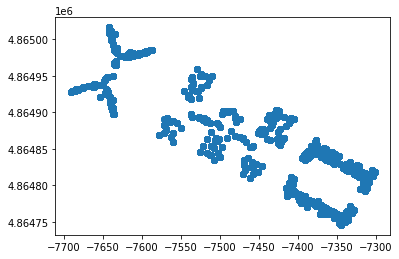

In [28]:
plt.scatter(x=train['LONGITUDE'],y=train['LATITUDE'])
plt.show()

#### [Step 3]
Select features from attributes.

In [29]:
train.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [30]:
# Drop unnecessary attributes
train.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID','TIMESTAMP'], axis=1, inplace=True)
test.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID','TIMESTAMP'], axis=1, inplace=True)

In [138]:
# Slicing features and target
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

#### [Step 4]
Perform experiments using K-nearest Neighbors method. Observe performance and test score.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

In [35]:
# [1] Perform one experiment, test F1 Score.
## Preliminary K=3, predict y_hat, test score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores = f1_score(y_test, y_pred, average='macro')

print(f'F1 Score: {f1_scores:.3f}')

F1 Score: 0.990


In [37]:
# [2.1] Perform different K values
no_neighbors = np.arange(1,30)
f1_scores = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    f1_scores[i] = f1_score(y_test, y_pred, average='macro')
    print(f' F1 Score: {f1_scores[i]:.3f}')

 F1 Score: 0.988
 F1 Score: 0.983
 F1 Score: 0.990
 F1 Score: 0.987
 F1 Score: 0.989
 F1 Score: 0.988
 F1 Score: 0.987
 F1 Score: 0.983
 F1 Score: 0.986
 F1 Score: 0.985
 F1 Score: 0.986
 F1 Score: 0.984
 F1 Score: 0.983
 F1 Score: 0.983
 F1 Score: 0.985
 F1 Score: 0.986
 F1 Score: 0.985
 F1 Score: 0.982
 F1 Score: 0.984
 F1 Score: 0.983
 F1 Score: 0.986
 F1 Score: 0.984
 F1 Score: 0.986
 F1 Score: 0.982
 F1 Score: 0.983
 F1 Score: 0.980
 F1 Score: 0.981
 F1 Score: 0.978
 F1 Score: 0.982


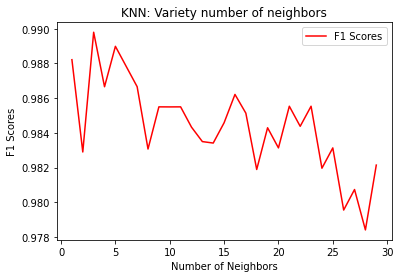

In [39]:
# [2.2] Plot F1 Scores for each K
plt.title('KNN: Variety number of neighbors')
plt.plot(no_neighbors, f1_scores, label = 'F1 Scores', c='red')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Scores')
plt.show()

In [42]:
# [3] Observation
'We observed that the performance testing in this case, K in range 1-30, given noises. The best F1-Scores observed at 0.990 where K=3 in this case study.'

'We observed that the performance testing in this case, K in range 1-30, given noises. The best F1-Scores observed at 0.990 where K=3 in this case study.'

In [43]:
# [4] Choose the best model
'Based on F1 scores where k=3 is the best model selection'

'Based on F1 scores where k=3 is the best model selection'

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [59]:
# [5] Data Normalization and Data Standardization
## Normalization
norm = MinMaxScaler()
x_train_normed = norm.fit_transform(x_train)
x_test_normed = norm.fit_transform(x_test)
## Standardization (Z)
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.fit_transform(x_test)

In [186]:
# [6] Perform one experiment
### fitting with data normed
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_normed, y_train)
y_pred = knn.predict(x_test_normed)
f1_scores_normed = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score for data normed: {f1_scores_normed:.3f}')

F1 Score for data normed: 0.841


In [187]:
### fitting with data standard (Z)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_std, y_train)
y_pred = knn.predict(x_test_std)
f1_scores_std = f1_score(y_test, y_pred,average='macro')
print(f'F1 Score for data standard (Z): {f1_scores_std:.3f}')

F1 Score for data standard (Z): 0.938


In [67]:
# [7] observation:
'We found that data normalization and data standardization did not improve F1 scores'

'We found that data normalization and data standardization did not improve F1 scores'

In [185]:
# [7] Plot


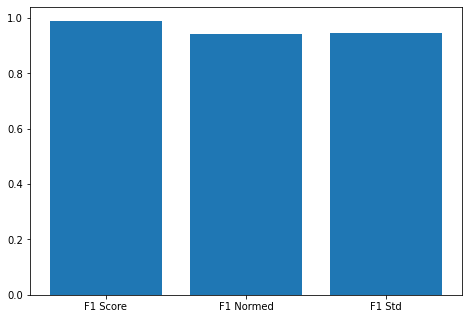

In [184]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
f1 = ['F1 Score', 'F1 Normed','F1 Std']
F1_value = [f1_scores, f1_scores_normed, f1_scores_std]
ax.bar(f1,F1_value)
plt.show()

#### Step [5]
Perform experiments using Decision Tree method. Observe performance and test score.

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
# [1] Perform one experiment, observe F1 Score.
dt_clf = DecisionTreeClassifier(max_depth=40)
dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)
f1_scores = f1_score(y_test, y_pred, average='macro')

print(f'F1 Score: {f1_scores:.3f}')

F1 Score: 0.990


In [83]:
# [2] Data Normalization and Data Standardization
## Normalization
norm = MinMaxScaler()
x_train_normed = norm.fit_transform(x_train)
x_test_normed = norm.fit_transform(x_test)
## Standardization (Z)
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.fit_transform(x_test)

In [131]:
# [3] Perform one experiment
### fitting with data normed
dt_clf = DecisionTreeClassifier(max_depth=13)
dt_clf.fit(x_train_normed, y_train)
y_pred = dt_clf.predict(x_test_normed)
f1_scores_normed = f1_score(y_test, y_pred, average='macro')

print(f'F1 Score with normed data: {f1_scores_normed:.3f}')

F1 Score with normed data: 0.943


In [109]:
### fitting with data standardize (Z)
dt_clf = DecisionTreeClassifier(max_depth=13)
dt_clf.fit(x_train_std, y_train)
y_pred = dt_clf.predict(x_test_std)
f1_scores_std = f1_score(y_test, y_pred, average='macro')

print(f'F1 Score with standardized data {f1_scores_std:.3f}')

F1 Score with standardized data 0.944


In [110]:
# [4] Observation
'We observe that data normalization and data standardization did improve F1 scores for using DT method. We found that using DT method in this case study given a very long leaf node without data scaling, as the result 13 leaf node were found by data normalization, standardization - we conclude that this method still not the best choice.'

'We observe that data normalization and data standardization did improve F1 scores for using DT method. We found that using DT method in this case study given a very long leaf node without data scaling, as the result 13 leaf node were found by data normalization, standardization - we conclude that this method still not the best choice.'

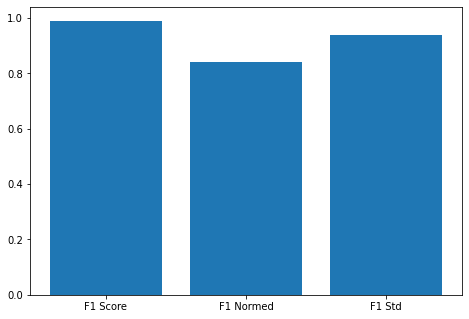

In [188]:
# [4] Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
f1 = ['F1 Score', 'F1 Normed','F1 Std']
F1_value = [f1_scores, f1_scores_normed, f1_scores_std]
ax.bar(f1,F1_value)
plt.show()

#### [Step 6] Finding
Comparison the KNN model and DT model.

In [132]:
'In comparison between KNN model and DT Model, we found that to get the best score of F1 at 0.990 by using KNN is better than DT. However, data scaling did not improve F1 score by using KNN model. On the other hand, to get the best f1 score at 0.990 by using DT method that is long process and the leaf node is still long. We consider KNN is better.'

'In comparison between KNN model and DT Model, we found that to get the best score of F1 at 0.990 by using KNN is better than DT. However, data scaling did not improve F1 score by using KNN model. On the other hand, to get the best f1 score at 0.990 by using DT method that is long process and the leaf node is still long. We consider KNN is better.'

## Assignment 4

## Objective
`In this practice, we encouter by sample size of data to observe the model best fit by using the same method in the last assignment`

In [157]:
# [1] 20% samples
train.sample(frac=0.2)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
2653,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-85,100,100,100,100,2
13735,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-90,100,100,100,2
12136,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-74,100,100,100,2
11220,100,100,100,100,100,100,-79,100,100,100,...,100,100,100,100,100,100,100,100,100,0
10508,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9575,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
16730,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
6493,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
5029,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2


In [160]:
F1_list = []

In [169]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_20 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_20)
print(f'F1 Score: {f1_scores_20:.3f}')

F1 Score: 0.990


In [170]:
# [2] 40% samples
train.sample(frac=0.4)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_40 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_40)
print(f'F1 Score: {f1_scores_40:.3f}')

F1 Score: 0.990


In [171]:
# [2] 60% samples
train.sample(frac=0.6)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_60 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_60)
print(f'F1 Score: {f1_scores_60:.3f}')

F1 Score: 0.990


In [172]:
# [3] 80% sample
train.sample(frac=0.8)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_80 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_80)
print(f'F1 Score: {f1_scores_80:.3f}')

F1 Score: 0.990


In [173]:
# [4] 100% sample
train.sample(frac=1.0)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_100 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_100)
print(f'F1 Score: {f1_scores_100:.3f}')

F1 Score: 0.990


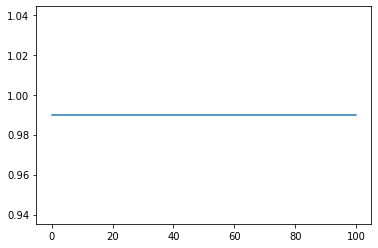

In [182]:
size = [0,10,20,40,60,80,100]
plt.plot(size,F1_list,label = 'F1 Scores')

### Conclusion

`In this case, we conclude that increasing sample size did not make the fit of model change. To save time by performance testing, we can use sample size as less as we can.`